In [1]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
dataset = 'Immune_Human' # Lung, Immune_Human, Human_Retina, Pancreas
dir_path = "/home/ajita/Documents/data_integration/scDREAMER/data/"
emb_folder = "/home/ajita/Documents/data_integration/scDREAMER_pyTorch/output/"

In [3]:

def load_data(dataset,batch):
    
    if (dataset == "Human_Mouse"):
        dataset = "hum_mou"
        
    adata = sc.read_h5ad(dir_path + dataset + '.h5ad')
    sc.pp.filter_genes(adata, min_counts=3)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
            adata,
            flavor = "seurat",
            n_top_genes = 2000,
            layer = "counts",
            batch_key = batch,
            subset = True
    )
    return adata

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    } 

our_method_emb_dic = {
                "Pancreas" : "Pancreas/Pancreas_latent_matrix",
                 "Immune_Human" : "Immune_Human/Immune_Human_latent_matrix_correctedkl_0.1dis",
                 'Lung' : 'Lung/Lung_latent_matrix_dis50',
                 'Human_Retina': "Human_Retina/Human_Retina_latent_matrix" ,
                'Human_Mouse' : "Human_Mouse/Human_Mouse_latent_matrix"
                } 


In [4]:

embeddings = our_method_emb_dic[dataset]+'.csv'

batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]

adata = load_data(dataset,batch)
emb_path = emb_folder + embeddings 

final_embedings=pd.read_csv(emb_path, sep=',',header=None).values
adata.obsm['final_embeddings'] = final_embedings


Clustering...
use rep: final_embeddings
0.0001 1
0.0790421052631579 6
0.15798421052631578 6
0.23692631578947368 8
0.3158684210526316 8
0.3948105263157895 10
0.47375263157894737 12
0.5526947368421052 13
0.6316368421052632 13
0.7105789473684211 14
0.789521052631579 14
0.8684631578947368 14
0.9474052631578948 15
1.0263473684210527 16
1.1052894736842105 17
1.1842315789473685 18
1.2631736842105263 18
1.3421157894736842 21
1.4210578947368422 22
1.5 22


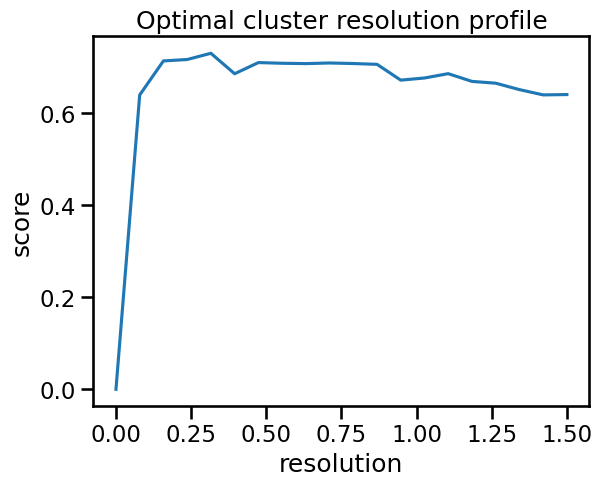

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 6
0.15798421052631578 6
0.23692631578947368 8
0.3158684210526316 8
0.3948105263157895 10
0.47375263157894737 12
0.5526947368421052 13
0.6316368421052632 13
0.7105789473684211 14
0.789521052631579 14
0.8684631578947368 14
0.9474052631578948 15
1.0263473684210527 16
1.1052894736842105 17
1.1842315789473685 18
1.2631736842105263 18
1.3421157894736842 21
1.4210578947368422 22
1.5 22
use rep: final_embeddings
0.0001 1
0.0790421052631579 6
0.15798421052631578 6
0.23692631578947368 8
0.3158684210526316 8
0.3948105263157895 10
0.47375263157894737 12
0.5526947368421052 13
0.6316368421052632 13
0.7105789473684211 14
0.789521052631579 14
0.8684631578947368 14
0.9474052631578948 15
1.0263473684210527 16
1.1052894736842105 17
1.1842315789473685 18
1.2631736842105263 18
1.3421157894736842 21
1.4210578947368422 22
1.5 22
use rep: final_embeddings
0.0001 1
0.0790421052631579 6

In [5]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True, #
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=True,  # backwards compatibility # isolated scores False for human mouse
                isolated_labels_f1_=True,
                isolated_labels_asw_=True,
                n_isolated=None,
                graph_conn_=True, #
                kBET_=True,#True,#
                kBET_sub=0.5,
                lisi_graph_=True,#
                lisi_raw=True,#
                trajectory_=False,
                type_=None,
                verbose=False,
        )

In [6]:
results

0
NMI_cluster/label          0.729605
ARI_cluster/label          0.711640
ASW_label                  0.560155
ASW_label/batch            0.905235
PCR_batch                  0.883901
cell_cycle_conservation         NaN
isolated_label_F1          0.494989
isolated_label_silhouette  0.547051
graph_conn                 0.826646
kBET                       0.476448
iLISI                      0.337292
cLISI                      0.987003
hvg_overlap                     NaN
trajectory                      NaN

In [7]:
ilisi_all

batch
0      3.221070
1      4.602420
2      1.952936
3      6.724487
4      2.502729
...         ...
16792  3.709558
16793  4.368475
16794  4.264108
16795  3.473183
16796  3.541568

[16797 rows x 1 columns]

In [8]:
kbet_all

0     [0.44, 0.46, 0.51, 0.55, 0.42, 0.49, 0.46, 0.4...
1     [0.4437386569872958, 0.47186932849364793, 0.46...
2     [0.386748844375963, 0.3574730354391371, 0.3605...
3     [0.8363636363636363, 0.8327272727272728, 0.872...
4     [0.3125, 0.2916666666666667, 0.354166666666666...
5     [0.9041095890410958, 0.8995433789954338, 0.867...
6     [0.7350993377483444, 0.7350993377483444, 0.721...
7     [0.08, 0.2, 0.2, 0.12, 0.16, 0.32, 0.24, 0.16,...
8     [0.5, 0.4318181818181818, 0.38636363636363635,...
9     [0.5116279069767442, 0.4883720930232558, 0.488...
10    [0.5, 0.4861111111111111, 0.4826388888888889, ...
11    [0.8627450980392157, 0.8235294117647058, 0.754...
12    [0.24, 0.16, 0.12, 0.2, 0.12, 0.24, 0.2, 0.44,...
13    [0.7021276595744681, 0.7021276595744681, 0.680...
14    [0.37037037037037035, 0.18518518518518517, 0.4...
15    [0.49130434782608695, 0.5130434782608696, 0.53...
Name: kBET_all, dtype: object

In [9]:
import numpy as np
path_to_save = "/home/ajita/Documents/data_integration/scDREAMER/scDREAMER/metrics/"
np.savetxt(path_to_save+dataset+"_ilisi.csv", ilisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_clisi.csv", clisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_kbet_all.csv",np.concatenate([np.array(val).reshape(1,-1) for val in kbet_all],axis = 0), delimiter=',')

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


latent_matrix = adata.obsm['final_embeddings'] 
labels = np.array(adata.obs[cell_type])
K = np.size(np.unique(labels))
kmeans = KMeans(n_clusters=K, random_state=0).fit(latent_matrix)
y_pred = kmeans.labels_

print('Computing NMI ...')
NMI = nmi(labels.flatten(), y_pred.flatten())
print('NMI = {}'.format(NMI))

Computing NMI ...
NMI = 0.6485553834948073


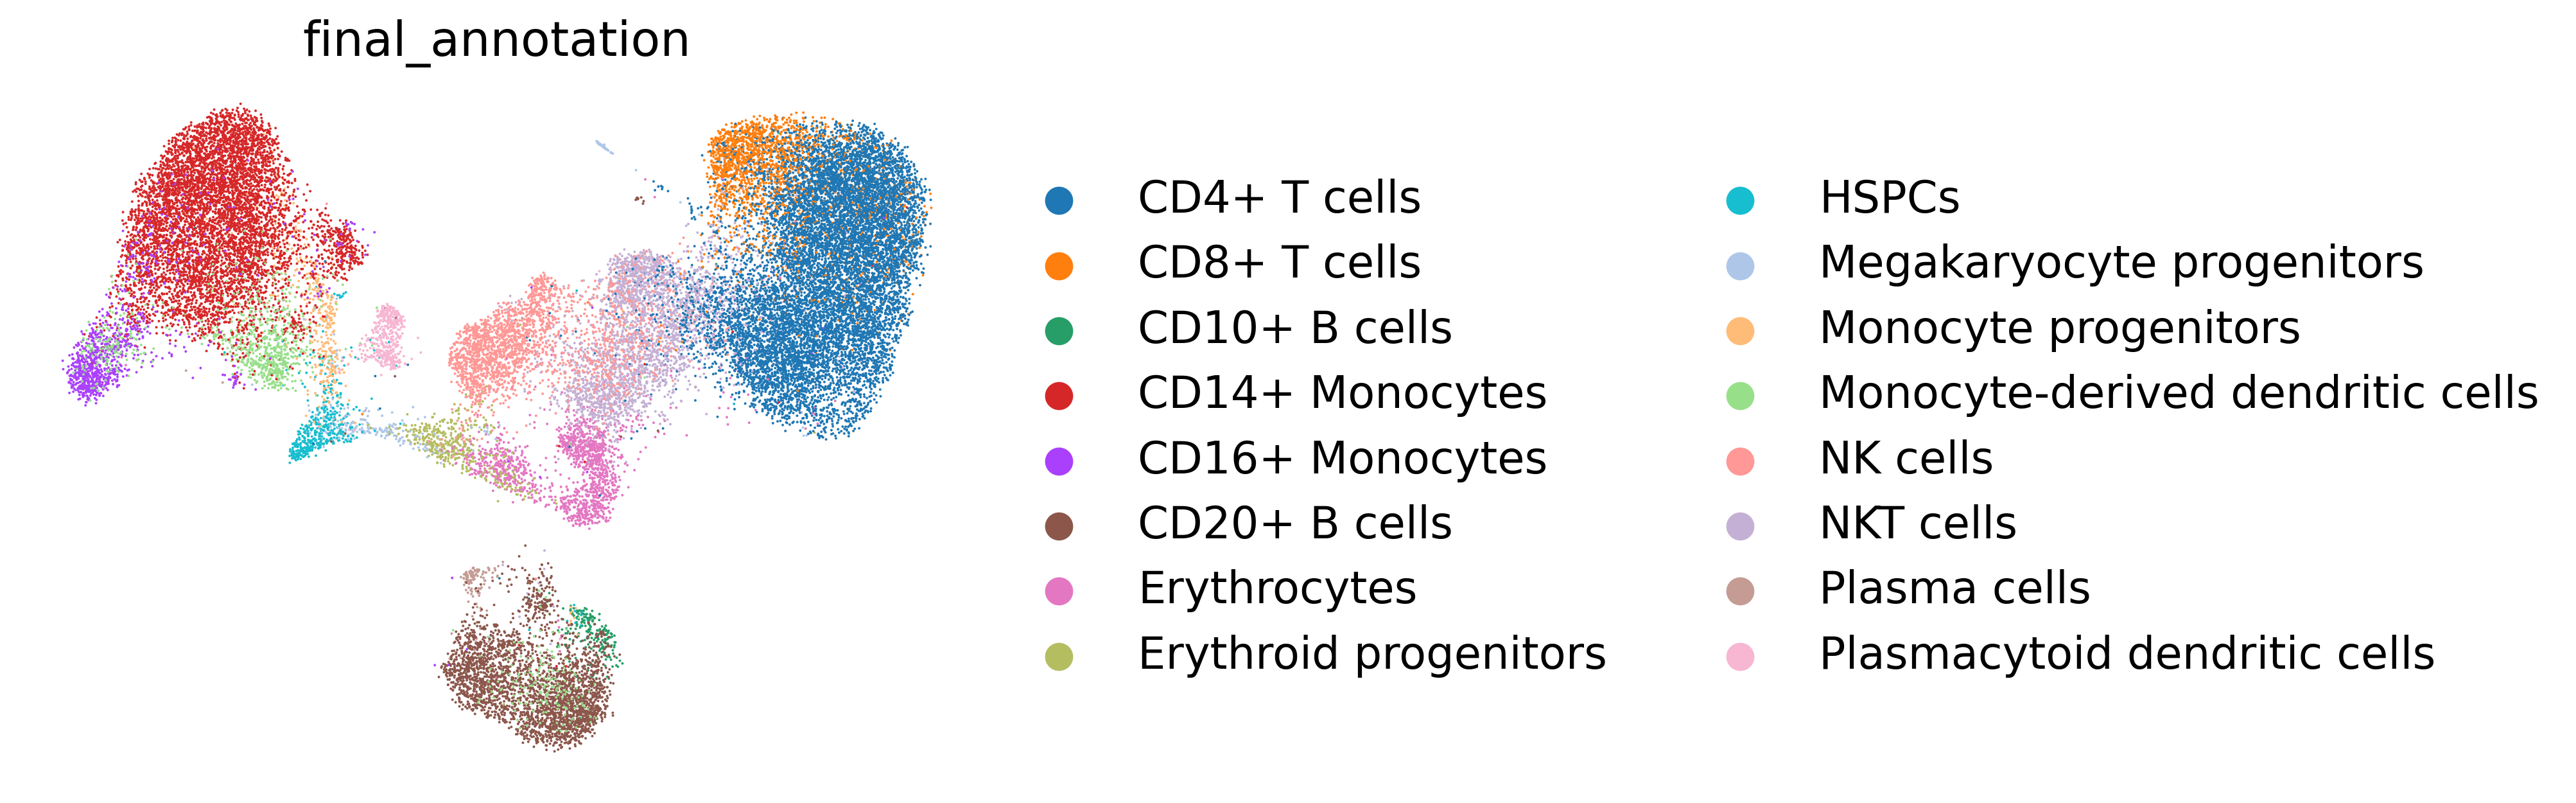

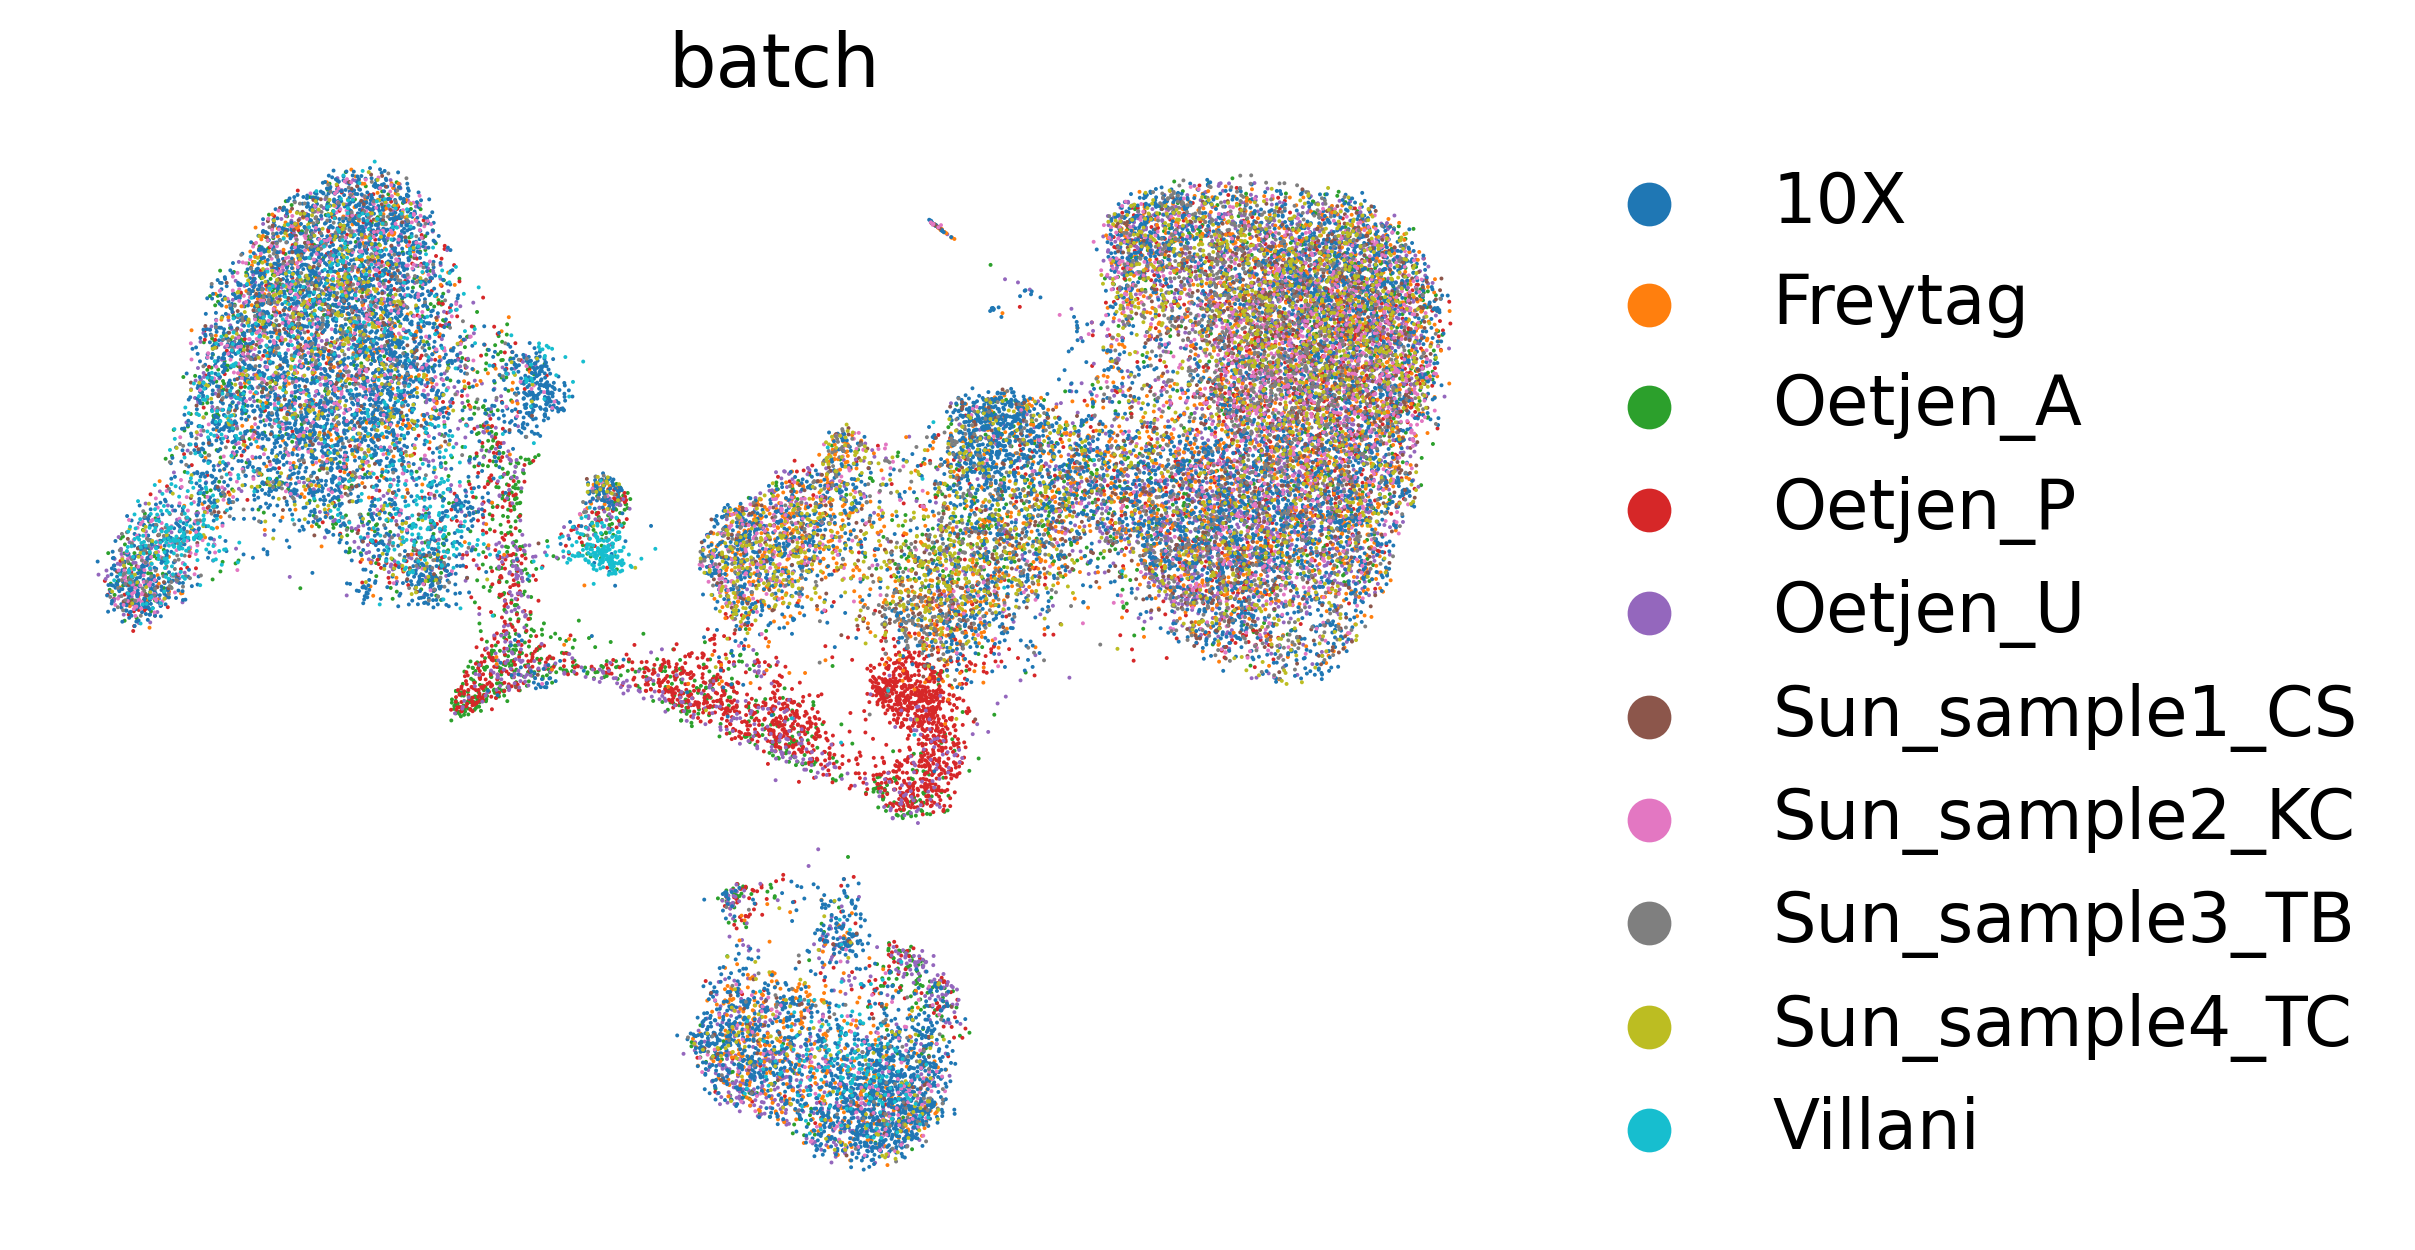

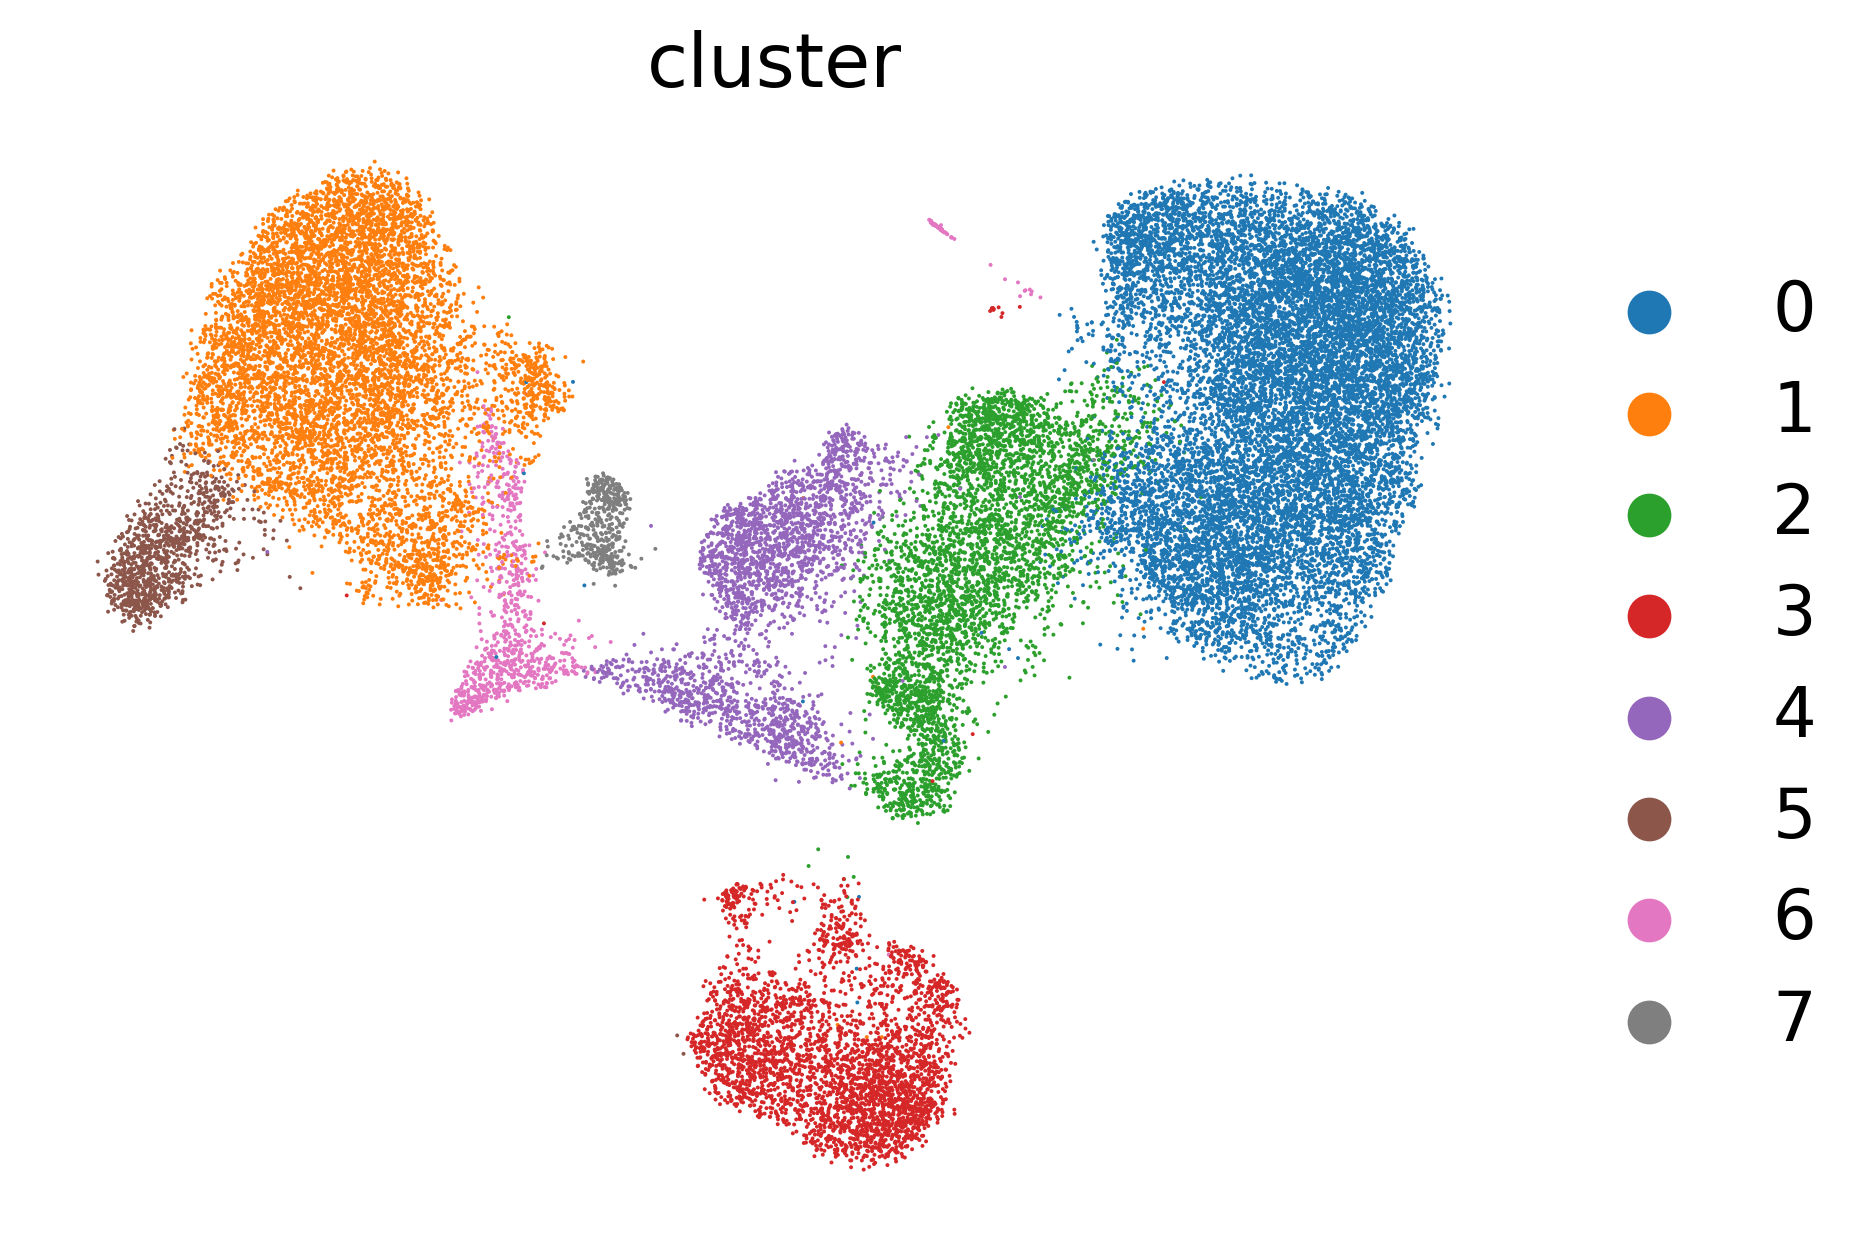

In [12]:
sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color=cell_type, frameon=False)
sc.pl.umap(adata, color=batch, frameon=False)
sc.pl.umap(adata, color='cluster', frameon=False)

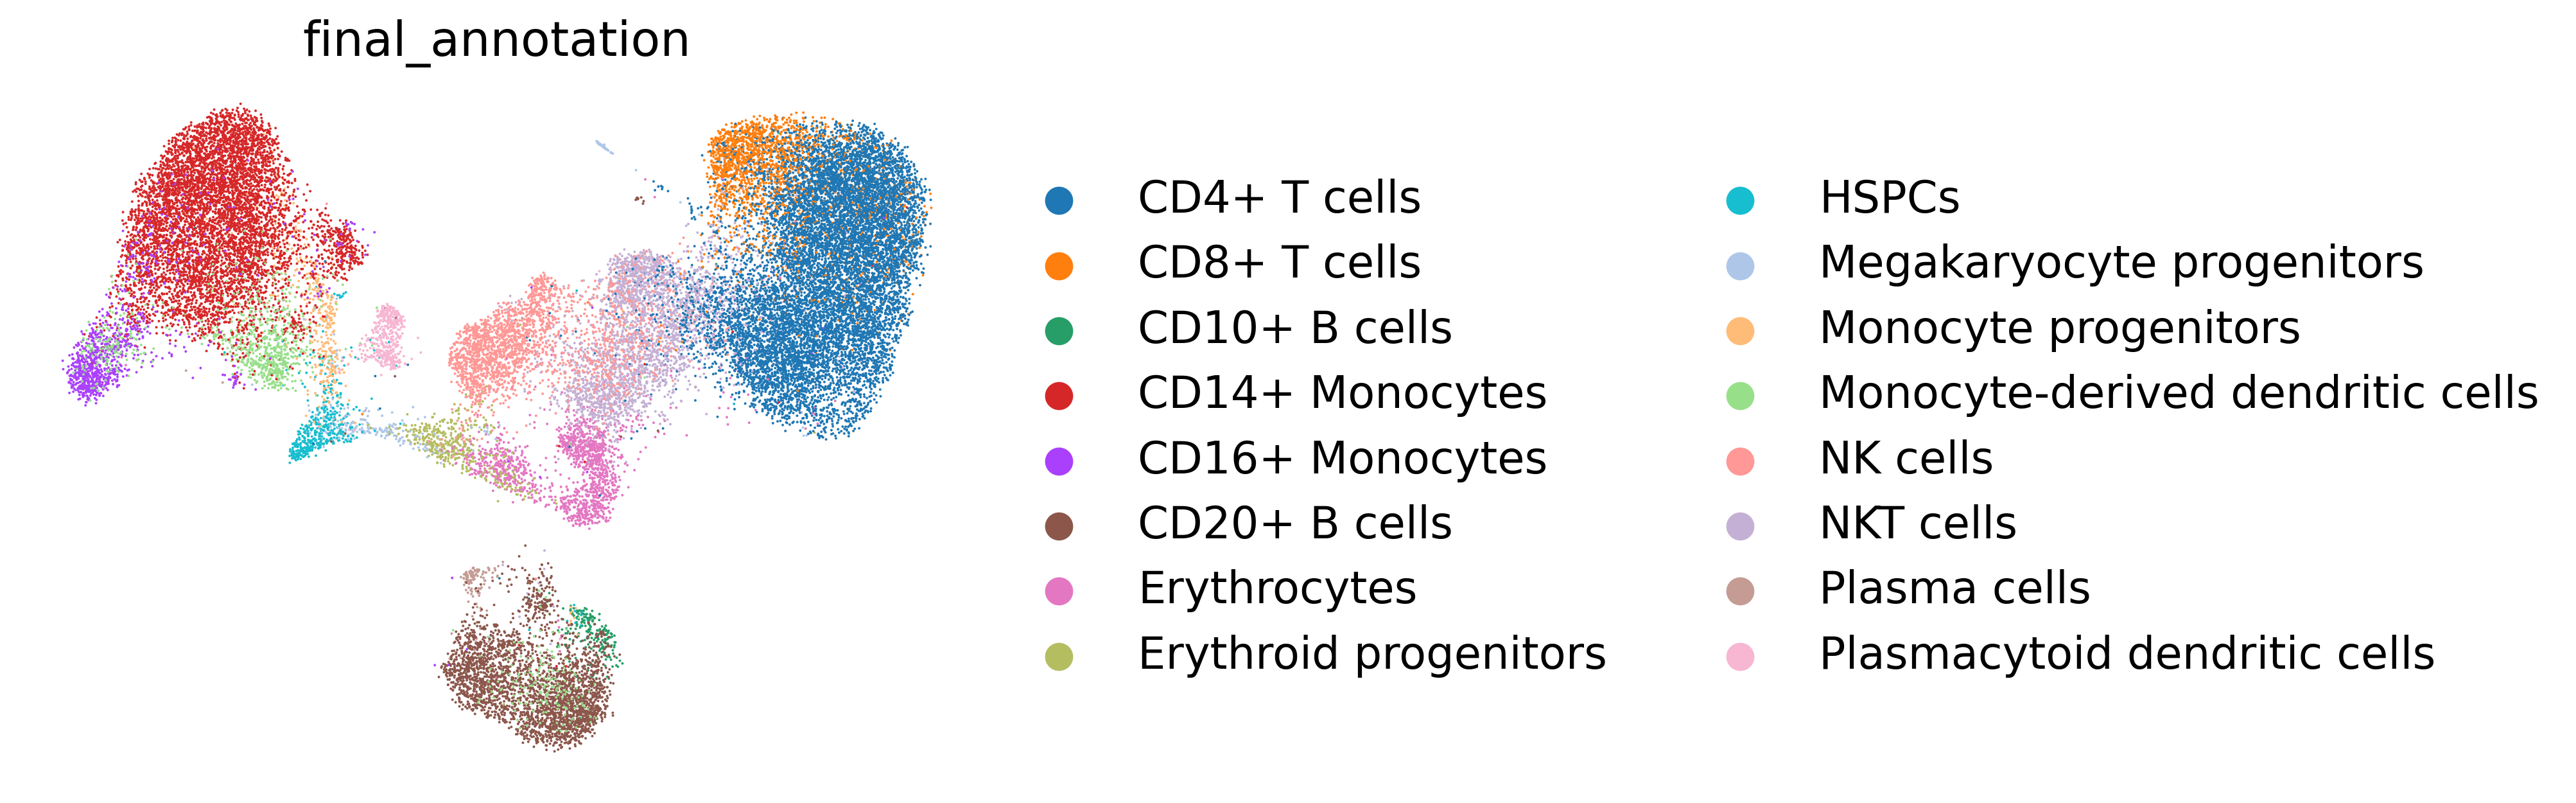

In [13]:
img = sc.pl.umap(adata, color=cell_type, frameon=False)

In [14]:
img

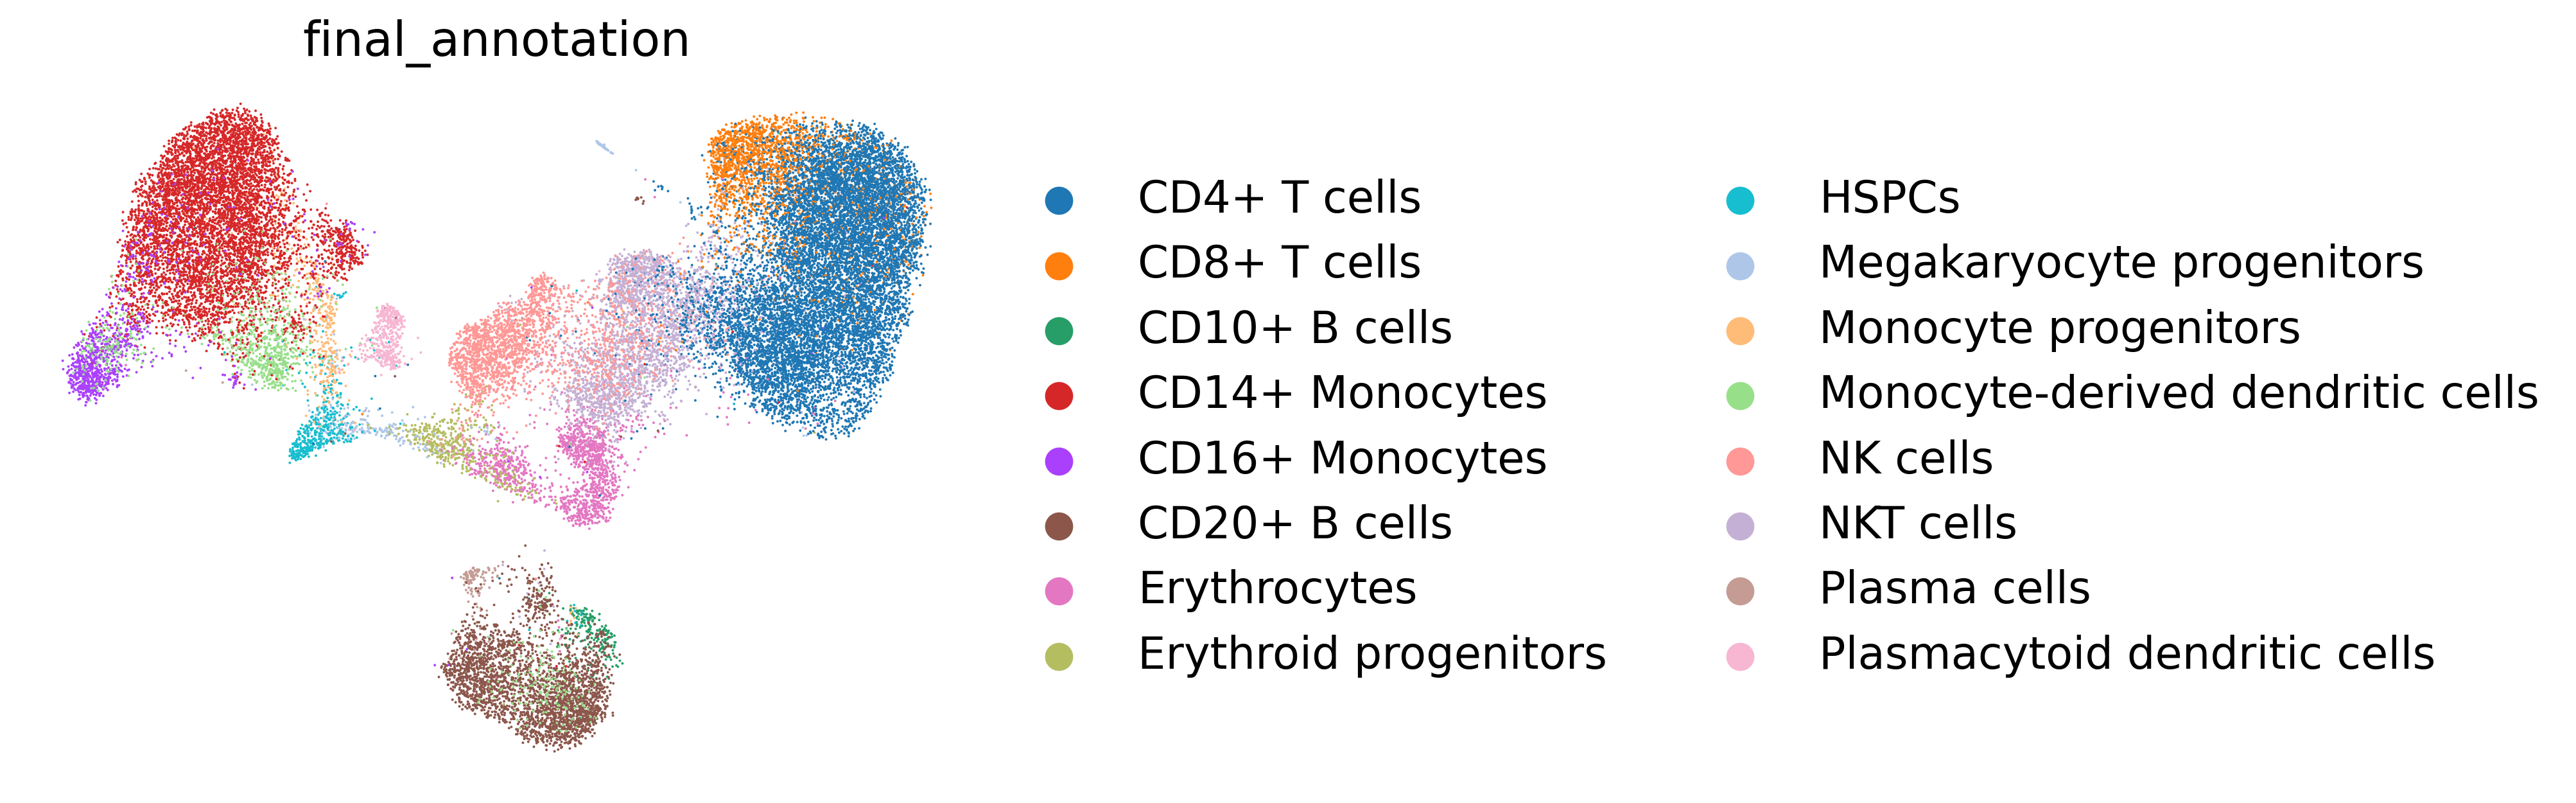

AttributeError: 'NoneType' object has no attribute 'savefig'

In [15]:
sc.pl.umap(adata, color=cell_type, frameon=False).savefig('foo.png', bbox_inches='tight')

In [ ]:
"""
Lung	scDREAMER-woDis	0.662155	0.499891	0.540511	0.874639	0.756987	0.248491	0.526552	0.646457	0.576346	0.260227	0.948805			250 epcohs	nan at 300					
"""